<h1> DS203 : Course Project </h1>
<h2>Exploratory Data Analysis on top 50 companies from the NIFTY 50 Market Index in the Indian Stock Market</h2>

In [16]:
# Importing all the required libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure


In [4]:
# Reading the data from the csv file and storing it inside a pandas dataframe
df = pd.read_csv("/Users/ozzajj/Desktop/DSproject/NIFTY50.data/ADANIPORTS.csv")
# Analysing the number of rows and the number of columns in the dataframe
size = df.shape
print("Number of Rows Present : " , size[0])
print("Number of Columns Present :" , size[1])

Number of Rows Present :  3322
Number of Columns Present : 15


<h2> 1. Plotting price v/s time diagrams to ascertain the variability of the stock

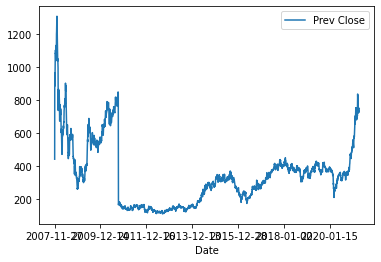

In [5]:
f = df.plot(x='Date', y='Prev Close')
plt.rcParams["figure.figsize"] = (30,7)

<h2> 2. Plotting a correlation heatmap to ascertain the relations in data if there is any </h2>

<AxesSubplot:>

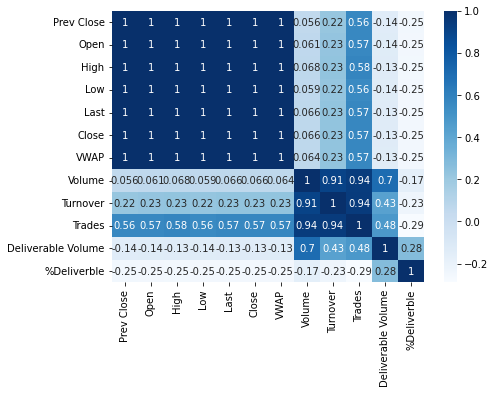

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

<h2> 3. Creating a new column for daily returns which creates a data variable which helps us predict what the daily returns are for that particular stock

In [18]:
df['Daily Returns'] = (df['Prev Close']/df['Open']) -1
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Returns
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,-0.428571
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,-0.021443
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,-0.016612
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,-0.006517
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,-0.019367


<h2> 4. Calculating the mean and standard deviation for the "Daily Returns" column to assess the variability and profitability of the stock

In [13]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('Mean =',mean)
print('Standard Deviation =',std)

mean = -0.0007058971193809345
Std deviation = 0.06962202093197153


<h2> 5. Performing a Kurtosis analysis on the given dataset to find out how "extreme" the values can get. A large positive kurtosis values indicates that the chance of extreme values is rare.

In [20]:
print("Kurtosis Variability - ", df['Daily Returns'].kurtosis())

Kurtosis Variability -  2993.2701367414534


<h2>6. Plotting a Historgam between the Daily returns and times with appropriate widths and vertical lines to seperate positive and negative values </h2>

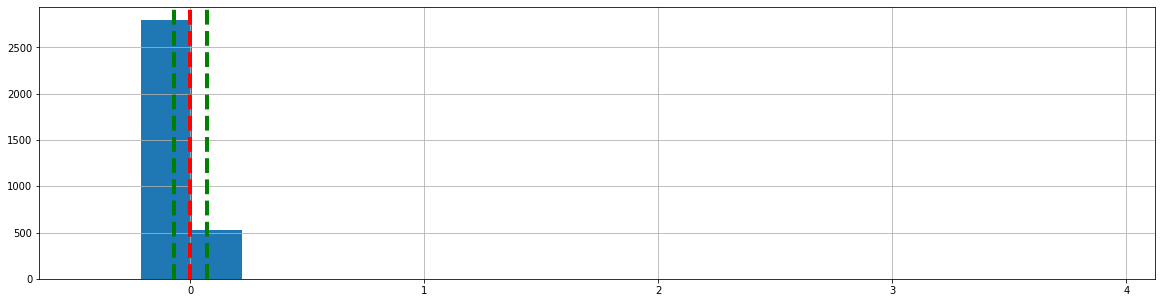

In [41]:
df['Daily Returns'].hist(bins=20)
plt.rcParams["figure.figsize"] = (20,5)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=4)
plt.axvline(std,color='g',linestyle='dashed',linewidth=4)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=4)

In [60]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
Daily Returns           0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

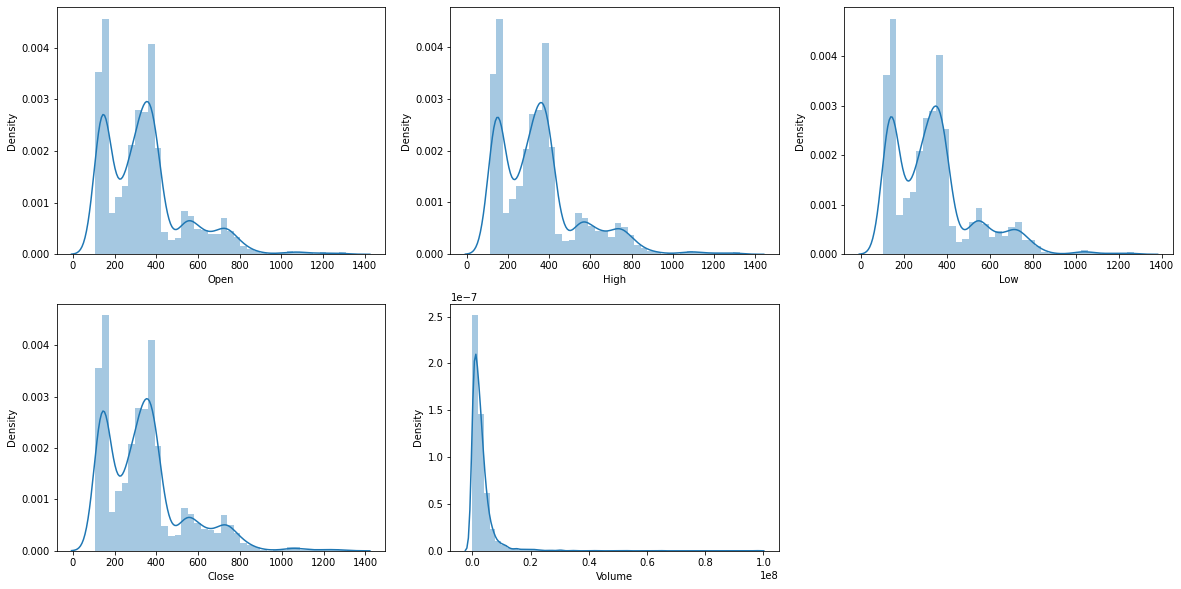

In [62]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

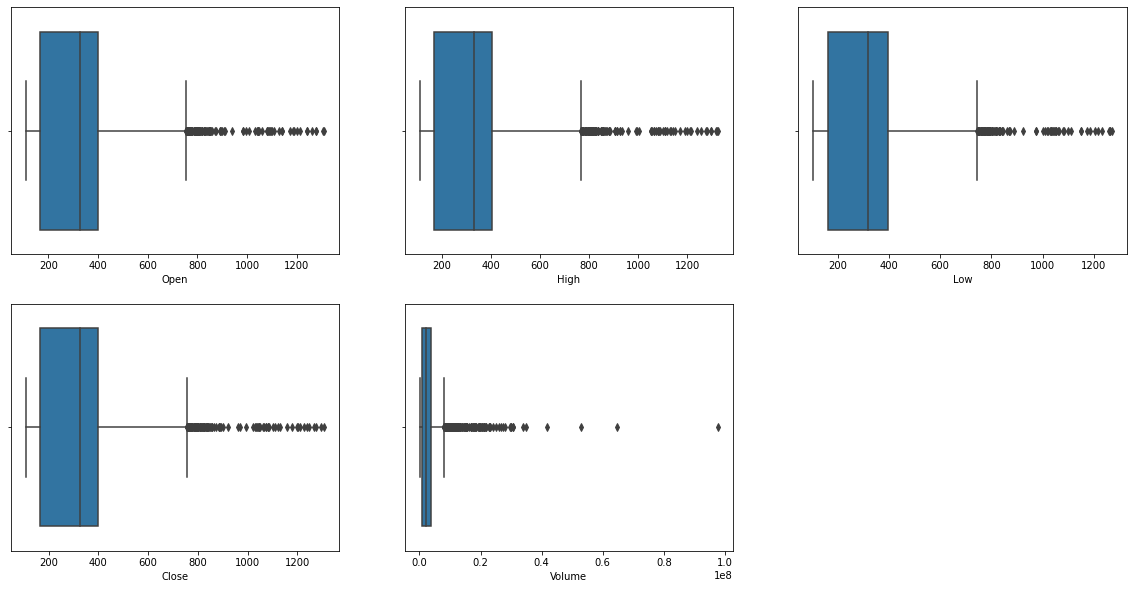

In [64]:

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [72]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

In [75]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Returns,day,month,year,is_quarter_end
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,-0.428571,27,11,2007,0
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,-0.021443,28,11,2007,0
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,-0.016612,29,11,2007,0
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,-0.006517,30,11,2007,0
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,-0.019367,3,12,2007,1


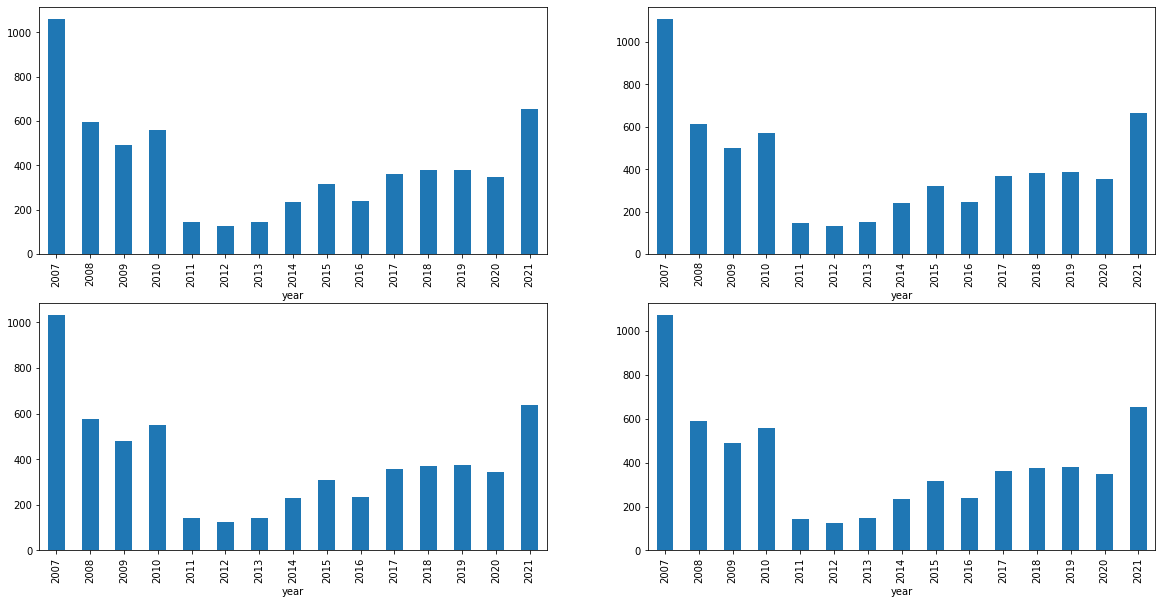

In [73]:

data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [76]:
df.groupby('is_quarter_end').mean()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Returns,day,month,year
is_quarter_end,,,,,,,,,,,,,,,,
0,342.663585,343.663108,350.626783,336.376284,343.097751,343.081236,343.755766,3.061767e+06,1.112664e+14,45937.849938,1.224637e+06,0.441570,-0.002393,15.846433,5.895048,2014.190822
1,346.962712,346.922614,353.534567,339.801070,346.481356,346.401427,347.007877,2.744079e+06,9.866605e+13,42933.654217,1.173678e+06,0.454397,0.002607,15.664585,7.517395,2013.994648


In [81]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [83]:

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2989, 3) (333, 3)


In [84]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5199830491628006
Validation Accuracy :  0.4867465504720407

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48271068332558764
Validation Accuracy :  0.4862200435729849

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9206630526371402
Validation A

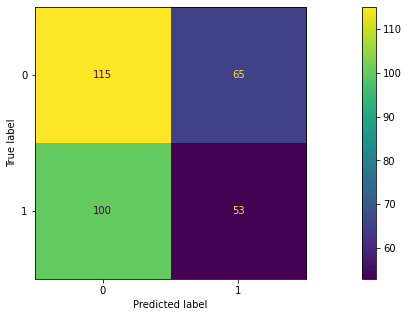

In [85]:

metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()